### Wielowarstwowa sieć konwolucyjna

Wielowarstwowe sieci konwolucyjne wykorzystują wielokrotne składanie operacji filtrowania i uczą się wykrywać bardzo złożone zależności.

Wówczas każda kolejna warstwa w jakiś sposób agreguje informacje z poprzedniej warstwy do ogólniejszego poziomu. Przykladowa interpretacja w kontekście klasyfikacji czy na danym zdjęciu jest człowiek:
- pierwsza warstwa: rozpoznawianie kształtów/konturów
- druga warstwa: detekcja części ciała
- trzecia: detekcja człowiek


<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

### Sieć konwolucyjna uczy się ekstrachować istotne "informacje" - parametrami sieci są wagi w filtrach.

Czyli sieć sama uczy się tego, co jest istotne w danych dla naszego celu.

W sieciach konwolucyjnych na wyjście splotu nakłada się funkcję aktywacji. Z reguły jest to ReLU:

<img src="https://ml4a.github.io/images/figures/relu.png" width="350">

Źródło: https://ml4a.github.io/images/figures/relu.png

Takie przekształcenie można interpretować w następujący sposób: jeżeli w danym obszarze jest coś co dany filtr "rozpoznaje" (wartość splotu większa od 0), to zwracamy po prostu wynik splotu. Natomiast jeśli dane nie pasują do danego filtra (wartość ujemna), to niezaleznie od tego co w tych danych jest, zwracamy 0, które mówi, że nie ma tego czego szukamy.

### Wyjście sieci

Ostatnia warsta konwolucyjna (lub pooling) jest rozwijana do wektora. Ten wektor jest przepuszczany przez warstwy dense, które prowadzą do predykcji. Oczywiście można dokonywać predykcji bezpośrednio z rozwiniętego wektora.

#### Uwaga (przypomnienie). Filtr dla obrazka 2D jest tablicą 2D. Natomiast kolejne warstwy są 3D - dochodzi wymiar liczby filtrów. Dlatego dalsze filtry są kostami 3D, które mają głębokość równą liczbie filtrów w poprzedniej warstwie.

<img src="https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg" width="700">

Źródło: https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg

Naturalnie, jeżeli na wejściu mamy obiekt więcej niż dwu-wymiarowy to już pierwsza warstwa używa filtrów, które są kostkami.

## Strides - wielkość kroku przesunięcia

Określa dokładność z jaką chcemy skanować dane.

Strides = (1,1)

<img src="https://adeshpande3.github.io/assets/Stride1.png" width="600">

Strides = (2,2)

<img src="https://adeshpande3.github.io/assets/Stride2.png" width="600">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/

#### Jeszcze jednym istotnym parametrem jest rozmiar filtra.

# Gray-scale faces

http://scikit-learn.org/0.15/auto_examples/applications/face_recognition.html

In [3]:
import numpy as np
import pandas as pd
import os
from keras.utils import np_utils

In [4]:
from sklearn.datasets import fetch_lfw_people

In [7]:
from sklearn.model_selection import train_test_split

In [6]:
import matplotlib.pyplot as plt

In [8]:
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [9]:
from keras.layers import Conv2D

In [10]:
from keras.layers import MaxPooling2D,AveragePooling2D

In [11]:
from keras.layers import Dropout

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
lfw_people = fetch_lfw_people(min_faces_per_person=70,resize=0.4)

X = lfw_people.images
y = lfw_people.target

In [14]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [15]:
X = X.reshape((1288,50,37,1))

In [16]:
lfw_people.images.shape

(1288, 50, 37)

In [17]:
y = np_utils.to_categorical(y)

In [18]:
y[:5]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4)

In [20]:
X_train.shape

(772, 50, 37, 1)

In [21]:
X_test.shape

(516, 50, 37, 1)

In [22]:
X_train /= 255

In [23]:
X_test /= 255

In [24]:
X_train[1,:,:,0].shape

(50, 37)

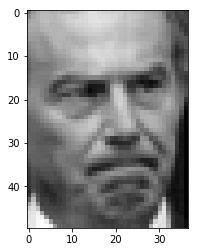

In [26]:
plt.imshow(X_train[1,:,:,0],cmap='gray')
plt.show()

In [27]:
X_train.shape

(772, 50, 37, 1)

### No convolutional layer

In [28]:
model = Sequential()
model.add(Flatten(input_shape=(50,37,1)))
model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3)#jeśli przez 3 kolejne kroki model sie nie poprawi to przerywa

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1850)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 12957     
Total params: 12,957
Trainable params: 12,957
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_split=0.25,epochs=100,callbacks=[early_stopping],verbose=2)

Train on 579 samples, validate on 193 samples
Epoch 1/100
 - 0s - loss: 1.9030 - acc: 0.2971 - val_loss: 1.7442 - val_acc: 0.4041
Epoch 2/100
 - 0s - loss: 1.7158 - acc: 0.4041 - val_loss: 1.6842 - val_acc: 0.4249
Epoch 3/100
 - 0s - loss: 1.6338 - acc: 0.4093 - val_loss: 1.6144 - val_acc: 0.4093
Epoch 4/100
 - 0s - loss: 1.5974 - acc: 0.4231 - val_loss: 1.6289 - val_acc: 0.4611
Epoch 5/100
 - 0s - loss: 1.5412 - acc: 0.4663 - val_loss: 1.5195 - val_acc: 0.4819
Epoch 6/100
 - 0s - loss: 1.4701 - acc: 0.4784 - val_loss: 1.6021 - val_acc: 0.4301
Epoch 7/100
 - 0s - loss: 1.4776 - acc: 0.4456 - val_loss: 1.4485 - val_acc: 0.5751
Epoch 8/100
 - 0s - loss: 1.3920 - acc: 0.5285 - val_loss: 1.3779 - val_acc: 0.5078
Epoch 9/100
 - 0s - loss: 1.3549 - acc: 0.5216 - val_loss: 1.4356 - val_acc: 0.4974
Epoch 10/100
 - 0s - loss: 1.3321 - acc: 0.5164 - val_loss: 1.3307 - val_acc: 0.5959
Epoch 11/100
 - 0s - loss: 1.2776 - acc: 0.5613 - val_loss: 1.2851 - val_acc: 0.5337
Epoch 12/100
 - 0s - loss: 1

In [31]:
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test,y_test))

772/772 [==============================] - 0s 56us/step
[0.933119172259316, 0.6787564766839378]
516/516 [==============================] - 0s 45us/step
[1.025804177735203, 0.6531007751937985]


### Model with one dense layer

In [32]:
model = Sequential()
model.add(Flatten(input_shape=(50,37,1)))
model.add(Dense(100,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3)#jeśli przez 3 kolejne kroi model sie nie poprawi to przerywa
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1850)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               185100    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 707       
Total params: 185,807
Trainable params: 185,807
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_split=0.25,epochs=100,callbacks=[early_stopping],verbose=2)

Train on 579 samples, validate on 193 samples
Epoch 1/100
 - 1s - loss: 1.8935 - acc: 0.3817 - val_loss: 1.6644 - val_acc: 0.4041
Epoch 2/100
 - 0s - loss: 1.6899 - acc: 0.4145 - val_loss: 1.7608 - val_acc: 0.4041
Epoch 3/100
 - 0s - loss: 1.6569 - acc: 0.4162 - val_loss: 1.5992 - val_acc: 0.4819
Epoch 4/100
 - 0s - loss: 1.5218 - acc: 0.4715 - val_loss: 1.5464 - val_acc: 0.4093
Epoch 5/100
 - 0s - loss: 1.4956 - acc: 0.4836 - val_loss: 1.4888 - val_acc: 0.4611
Epoch 6/100
 - 0s - loss: 1.3857 - acc: 0.5060 - val_loss: 1.3927 - val_acc: 0.5751
Epoch 7/100
 - 0s - loss: 1.4428 - acc: 0.5043 - val_loss: 1.5193 - val_acc: 0.5130
Epoch 8/100
 - 0s - loss: 1.3154 - acc: 0.4991 - val_loss: 1.3649 - val_acc: 0.5544
Epoch 9/100
 - 0s - loss: 1.2446 - acc: 0.5596 - val_loss: 1.2964 - val_acc: 0.5855
Epoch 10/100
 - 0s - loss: 1.2128 - acc: 0.5717 - val_loss: 1.2801 - val_acc: 0.5751
Epoch 11/100
 - 0s - loss: 1.1618 - acc: 0.5889 - val_loss: 1.1779 - val_acc: 0.6010
Epoch 12/100
 - 0s - loss: 1

In [34]:
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test,y_test))

772/772 [==============================] - 0s 72us/step
[0.9040276531728438, 0.7150259067357513]
516/516 [==============================] - 0s 49us/step
[1.0642260516336721, 0.6434108527131783]


### Model with one convolutional layer

In [35]:
model_conv = Sequential()

model_conv.add(Conv2D(8,(3,3),activation='relu',input_shape=(50,37,1)))
model_conv.add(Flatten())
model_conv.add(Dense(100,activation='relu'))
model_conv.add(Dense(7,activation='softmax'))
model_conv.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3)#jeśli przez 3 kolejne kroi model sie nie poprawi to przerywa
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 35, 8)         80        
_________________________________________________________________
flatten_3 (Flatten)          (None, 13440)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1344100   
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 707       
Total params: 1,344,887
Trainable params: 1,344,887
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_conv.fit(X_train,y_train,validation_split=0.25,epochs=100,callbacks=[early_stopping],verbose=2)

Train on 579 samples, validate on 193 samples
Epoch 1/100
 - 2s - loss: 1.7573 - acc: 0.3454 - val_loss: 1.6043 - val_acc: 0.4041
Epoch 2/100
 - 1s - loss: 1.5734 - acc: 0.4301 - val_loss: 1.5797 - val_acc: 0.4767
Epoch 3/100
 - 1s - loss: 1.4319 - acc: 0.4732 - val_loss: 1.4691 - val_acc: 0.4767
Epoch 4/100
 - 1s - loss: 1.3124 - acc: 0.5112 - val_loss: 1.2914 - val_acc: 0.5544
Epoch 5/100
 - 1s - loss: 1.1503 - acc: 0.6097 - val_loss: 1.2133 - val_acc: 0.6114
Epoch 6/100
 - 1s - loss: 1.0430 - acc: 0.6667 - val_loss: 1.1365 - val_acc: 0.6373
Epoch 7/100
 - 1s - loss: 0.9116 - acc: 0.7340 - val_loss: 1.1096 - val_acc: 0.5907
Epoch 8/100
 - 1s - loss: 0.8099 - acc: 0.7686 - val_loss: 1.0252 - val_acc: 0.6580
Epoch 9/100
 - 1s - loss: 0.7262 - acc: 0.7703 - val_loss: 0.9078 - val_acc: 0.7047
Epoch 10/100
 - 1s - loss: 0.6617 - acc: 0.8290 - val_loss: 0.9903 - val_acc: 0.6269
Epoch 11/100
 - 1s - loss: 0.6040 - acc: 0.8135 - val_loss: 0.9609 - val_acc: 0.6528
Epoch 12/100
 - 1s - loss: 0

In [37]:
print(model_conv.evaluate(X_train,y_train))
print(model_conv.evaluate(X_test,y_test))

772/772 [==============================] - 1s 655us/step
[0.23386973188948754, 0.9507772020725389]
516/516 [==============================] - 0s 664us/step
[0.6116619253343389, 0.8042635658914729]


## Model with max pooling

In [38]:
model_conv = Sequential()
model_conv.add(Conv2D(8,(3,3),activation='relu',input_shape=(50,37,1),padding='same'))
model_conv.add(MaxPooling2D())
model_conv.add(Flatten())
model_conv.add(Dense(128,activation='relu'))
model_conv.add(Dense(7,activation='softmax'))
model_conv.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3)#jeśli przez 3 kolejne kroi model sie nie poprawi to przerywa
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 37, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 18, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               460928    
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 903       
Total params: 461,911
Trainable params: 461,911
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_conv.fit(X_train,y_train,validation_split=0.25,epochs=100,callbacks=[early_stopping],verbose=2)

Train on 579 samples, validate on 193 samples
Epoch 1/100
 - 1s - loss: 0.2157 - acc: 0.9620 - val_loss: 0.5921 - val_acc: 0.7513
Epoch 2/100
 - 1s - loss: 0.1753 - acc: 0.9741 - val_loss: 0.4797 - val_acc: 0.8446
Epoch 3/100
 - 1s - loss: 0.1495 - acc: 0.9931 - val_loss: 0.5429 - val_acc: 0.8238
Epoch 4/100
 - 1s - loss: 0.1440 - acc: 0.9914 - val_loss: 0.5215 - val_acc: 0.8187
Epoch 5/100
 - 1s - loss: 0.1473 - acc: 0.9775 - val_loss: 0.4674 - val_acc: 0.8601
Epoch 6/100
 - 1s - loss: 0.1073 - acc: 0.9896 - val_loss: 0.4345 - val_acc: 0.8497
Epoch 7/100
 - 1s - loss: 0.1101 - acc: 0.9862 - val_loss: 0.4518 - val_acc: 0.8446
Epoch 8/100
 - 1s - loss: 0.0826 - acc: 1.0000 - val_loss: 0.4209 - val_acc: 0.8653
Epoch 9/100
 - 1s - loss: 0.0894 - acc: 0.9879 - val_loss: 0.4843 - val_acc: 0.8238
Epoch 10/100
 - 1s - loss: 0.0833 - acc: 0.9983 - val_loss: 0.4770 - val_acc: 0.8083
Epoch 11/100
 - 1s - loss: 0.0651 - acc: 1.0000 - val_loss: 0.4513 - val_acc: 0.8342


In [42]:
print(model_conv.evaluate(X_train,y_train))
print(model_conv.evaluate(X_test,y_test))

772/772 [==============================] - 1s 648us/step
[0.15541127327964713, 0.9585492227979274]
516/516 [==============================] - 0s 556us/step
[0.5385752914025802, 0.8468992248062015]


## Average pooling

In [43]:
model_conv = Sequential()
model_conv.add(Conv2D(8,(3,3),activation='relu',input_shape=(50,37,1),padding='same'))
model_conv.add(AveragePooling2D())
model_conv.add(Flatten())
model_conv.add(Dense(100,activation='relu'))
model_conv.add(Dense(7,activation='softmax'))
model_conv.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3)#jeśli przez 3 kolejne kroi model sie nie poprawi to przerywa
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 37, 8)         80        
_________________________________________________________________
average_pooling2d_1 (Average (None, 25, 18, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               360100    
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 707       
Total params: 360,887
Trainable params: 360,887
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_conv.fit(X_train,y_train,validation_split=0.25,epochs=100,callbacks=[early_stopping],verbose=2)

Train on 579 samples, validate on 193 samples
Epoch 1/100
 - 1s - loss: 1.7613 - acc: 0.3748 - val_loss: 1.6809 - val_acc: 0.4041
Epoch 2/100
 - 1s - loss: 1.6838 - acc: 0.3955 - val_loss: 1.6327 - val_acc: 0.4041
Epoch 3/100
 - 1s - loss: 1.6249 - acc: 0.3955 - val_loss: 1.5870 - val_acc: 0.4093
Epoch 4/100
 - 1s - loss: 1.5183 - acc: 0.4335 - val_loss: 1.5377 - val_acc: 0.4249
Epoch 5/100
 - 1s - loss: 1.4370 - acc: 0.4870 - val_loss: 1.4455 - val_acc: 0.4560
Epoch 6/100
 - 1s - loss: 1.3636 - acc: 0.4819 - val_loss: 1.4326 - val_acc: 0.5803
Epoch 7/100
 - 1s - loss: 1.2710 - acc: 0.5544 - val_loss: 1.3319 - val_acc: 0.5648
Epoch 8/100
 - 1s - loss: 1.1663 - acc: 0.5734 - val_loss: 1.1886 - val_acc: 0.5907
Epoch 9/100
 - 1s - loss: 1.0972 - acc: 0.6442 - val_loss: 1.1721 - val_acc: 0.5803
Epoch 10/100
 - 1s - loss: 0.9755 - acc: 0.6667 - val_loss: 1.1141 - val_acc: 0.6321
Epoch 11/100
 - 1s - loss: 0.8904 - acc: 0.7098 - val_loss: 1.0004 - val_acc: 0.6528
Epoch 12/100
 - 1s - loss: 0

In [45]:
print(model_conv.evaluate(X_train,y_train))
print(model_conv.evaluate(X_test,y_test))

772/772 [==============================] - 1s 721us/step
[0.3716142345895421, 0.9106217616580311]
516/516 [==============================] - 0s 695us/step
[0.6675881325274475, 0.7868217054263565]
